In [15]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
#os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu0,floatX=float32,optimizer=fast_compile'

In [6]:
path = "/home/saurabh/Documents/data/iccv09Data/images/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=90)

resize()

In [7]:
from keras.layers import Input,Dense
from keras.models import Model
print("Import complete")

Import complete


Using TensorFlow backend.


In [11]:
# Size of encoded repressentations

encoding_dim = 32  # 32 bit floats

In [12]:
# Create input placeholder   # Why the , after 784 ? why not (784)

input_img = Input(shape=(2352,))

In [13]:
# Encoded representation of the input 

encoded = Dense(encoding_dim, activation= 'relu')(input_image)

NameError: name 'input_image' is not defined

In [10]:
# Decoded -- Reconstruction(Lossy) of the input from the compressed rep of the encoder

decoded = Dense(2352, activation= 'sigmoid')(input_image)
print("sth")

NameError: name 'input_image' is not defined

In [9]:
autoencoder = Model(input_image, decoded)


In [10]:
# Encoder Model for I/P -------> Encoded representation

encoder = Model(inputs= input_image, outputs= encoded)

In [11]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(24300,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(24300, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [12]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [13]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [29]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [15]:
#from keras.datasets import mnist
#import numpy as np
#(x_train, _), (x_test, _) = mnist.load_data()

In [16]:
#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
##x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#print (x_train.shape)
#print (x_test.shape)

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import os, sys
import numpy as np
import math
from PIL import Image
#import cPickle as pkl
import _pickle as cPickle
import time
import tensorflow as tf
#import tensorflow.examples.tutorials.mnist.input_data as input_data
import glob
%matplotlib inline  
print ("Packages loaded")

Packages loaded


In [17]:
import glob
dirpath = "/home/saurabh/Documents/data/iccv09Data/images/"
height = 90
width  = 90
resize_ratio = 3
nr_img = 0
fileList = glob.glob(dirpath + '*.jpg')
for i, file in enumerate(fileList):
    img = Image.open(file)
    array = np.array(img) 
    if array.shape[0] == height and array.shape[1] == width:
        nr_img = nr_img + 1
        rgb = array.reshape(1, height, width, 3)
        imglow = img.resize((int(width/resize_ratio)
                ,int(height/resize_ratio)), Image.BICUBIC)
        imglow = imglow.resize((width, height), Image.BICUBIC)
        rgblow = np.array(np.float32(imglow)/255.)
        rgblow = rgblow.reshape(1, height, width, 3)
        rgb = np.reshape(rgb, [1, -1])
        rgblow = np.reshape(rgblow, [1, -1])
        if nr_img == 1:
            data = rgb
            datalow = rgblow
        else:
            data = np.concatenate((data, rgb), axis=0)
            datalow = np.concatenate((datalow, rgblow), axis=0)
        
print ("nr_img is %d" % (nr_img))
print ("Shape of 'data' is %s" % (data.shape,))
print ("Shape of 'datalow' is %s" % (datalow.shape,))

nr_img is 63
Shape of 'data' is (63, 24300)
Shape of 'datalow' is (63, 24300)


In [18]:
randidx = np.random.permutation(nr_img)
nrtrain = int(nr_img*0.7)
nrtest  = nr_img - nrtrain
xtrain  = datalow[randidx[0:nrtrain], :]
ytrain  = data[randidx[0:nrtrain], :]
xtest   = datalow[randidx[nrtrain:nr_img], :]
ytest   = data[randidx[nrtrain:nr_img], :]
print ("Shape of 'xtrain' is %s" % (xtrain.shape,))
print ("Shape of 'ytrain' is %s" % (ytrain.shape,))
print ("Shape of 'xtest' is %s" % (xtest.shape,))
print ("Shape of 'ytest' is %s" % (ytest.shape,))

Shape of 'xtrain' is (44, 24300)
Shape of 'ytrain' is (44, 24300)
Shape of 'xtest' is (19, 24300)
Shape of 'ytest' is (19, 24300)


In [19]:
from keras.datasets import mnist
import numpy as np
#(x_train, _), (x_test, _) = xtest, ytest
x_train = xtrain
x_test = ytest

In [20]:
#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(44, 24300)
(19, 24300)


In [30]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size= 2,
                shuffle=True,
                validation_data=(x_test, x_test))

ValueError: Error when checking model target: expected dense_13 to have shape (None, 2025) but got array with shape (44, 24300)

IndexError: index 3 is out of bounds for axis 0 with size 3

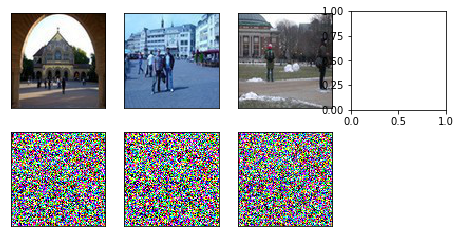

In [45]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(90, 90, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(90, 90,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep Autoencoder


In [33]:
input_img = Input(shape=(24300,))
encoded = Dense(4050, activation = 'relu')(input_img)
encoded = Dense(2025, activation='relu')(encoded)
encoded = Dense(1010, activation='relu')(encoded)

decoded = Dense(1010, activation='relu')(encoded)
decoded = Dense(2025, activation='relu')(decoded)
decoded = Dense(24300, activation='sigmoid')(decoded)


In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer ='adadelta', loss = 'binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=6,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 44 samples, validate on 19 samples
Epoch 1/10


# Convolutional Autoencoder (Add Phase shift)

In [14]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K